In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data from csv files
postings_data = pd.read_csv('data/postings.csv')

In [15]:
postings_data.job_id.count()

123849

In [48]:
# filter skills_desc not equal to NaN
postings_data = postings_data[postings_data.skills_desc.notnull()]
postings_data.skills_desc

# 117 of 123849, so means skills_desc is useless, we need to build our own skills_desc from the job description


90485     This position requires the following skills: E...
62667                                   \n\n\n\nPI239756106
52940     This Team Member will have:Educational Require...
32255                 \n\n\n\nPI69f82b5a5c24-29463-33240768
52350                 \n\n\n\nPId54d091d7872-29463-34208860
                                ...                        
51746     CPGallergen freecafeteriak-12media marketingsc...
112652                \n\n\n\nPI90a1f4a202b8-29463-34285069
98003                 \n\n\n\nPIb552cb83a07b-29463-34224954
12763     This position requires the following skills: A...
114066    Minimum qualifications:Show up EVERY day. (Att...
Name: skills_desc, Length: 117, dtype: object

In [28]:
# since too much data, we need to sample 5% data and save to a new csv file, then based on the new data to develop the model
postings_data_sample = postings_data.sample(frac=0.05, random_state=1)
postings_data_sample.to_csv('data/postings_sample.csv', index=False)

In [30]:
postings_data_sample.job_id.count()

6192

In [33]:
# Comment it after model is developed
postings_data = postings_data_sample

In [34]:
data_start = postings_data.original_listed_time.min()
# convert the data_start to datetime
pd.to_datetime(data_start, unit='ms')

Timestamp('2024-02-14 20:08:13')

In [35]:
data_end = postings_data.original_listed_time.max()
# convert the data_end to datetime
pd.to_datetime(data_end, unit='ms')

Timestamp('2024-04-20 00:26:30')

In [37]:
# order post by posted time
postings_data_ordered = postings_data.sort_values(by='original_listed_time', ascending=True)
# convert the listed_time column to datetime
postings_data["original_listed_time"] = pd.to_datetime(postings_data["original_listed_time"], unit='ms')
postings_data["original_listed_time"].head()

109896   2024-04-19 02:25:01
15087    2024-04-06 03:19:27
101176   2024-04-18 18:19:35
106314   2024-04-18 22:13:08
79678    2024-04-18 21:22:08
Name: original_listed_time, dtype: datetime64[ns]

In [38]:
postings_data["formatted_experience_level"].unique()

array(['Associate', nan, 'Entry level', 'Mid-Senior level', 'Internship',
       'Director', 'Executive'], dtype=object)

In [25]:
postings_data["work_type"].unique()

array(['FULL_TIME', 'INTERNSHIP', 'CONTRACT', 'PART_TIME', 'TEMPORARY',
       'VOLUNTEER', 'OTHER'], dtype=object)

In [31]:
index = postings_data["views"].argmax()
postings_data.iloc[index]

job_id                                                               3904407770
company_name                                                             Zillow
title                                        Senior Business Operations Manager
description                   About The Team\n\nZillow Group’s mission is to...
max_salary                                                             173400.0
pay_period                                                               YEARLY
location                                                          United States
company_id                                                              13990.0
views                                                                    9975.0
med_salary                                                                  NaN
min_salary                                                             108600.0
formatted_work_type                                                   Full-time
applies                                 

In [38]:
# load company_industry data from csv files
company_industry_data = pd.read_csv('data/companies/company_industries.csv')

# combine the postings_data and company_industry_data using company_id as the binding key
combined_data = pd.merge(postings_data, company_industry_data, on='company_id')



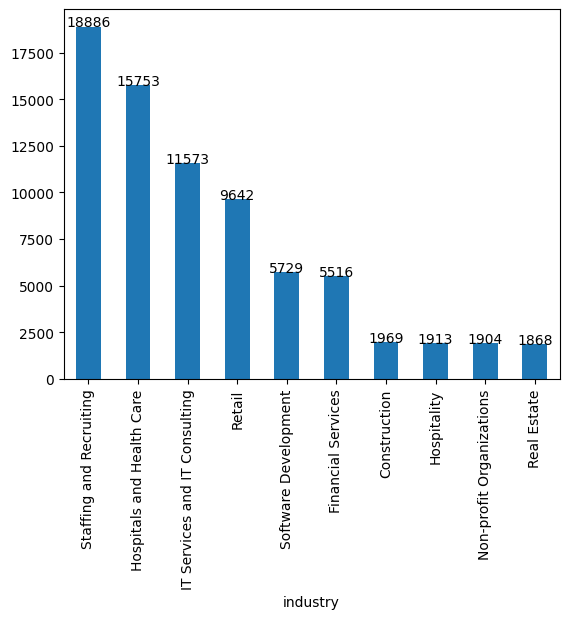

In [49]:
# we have industry in the combined data, so show the job posting frequency by industry
industry_counts = combined_data['industry'].value_counts()

# list top 10 highest job posting industries, and plot the data
top_10_industries = industry_counts.head(10)
top_10_industries.plot(kind='bar')

# show value counts of each bar in the plot
for i, v in enumerate(top_10_industries):
    plt.text(i, v + 10, str(v), ha='center')

In [39]:
company_data = pd.read_csv('data/companies/companies.csv')

In [40]:
company_data

,company_id,name,description,company_size,state,country,city,zip_code,address,url
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare
2,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...
3,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle
4,1033,Accenture,Accenture is a leading global professional ser...,7.0,0,IE,Dublin 2,0,Grand Canal Harbour,https://www.linkedin.com/company/accenture
...,...,...,...,...,...,...,...,...,...,...
24468,103463217,JRC Services,NaN,2.0,0,0,0,0,0,https://www.linkedin.com/company/jrcservices
24469,103466352,Centent Consulting LLC,Centent Consulting LLC is a reputable human re...,NaN,0,0,0,0,0,https://www.linkedin.com/company/centent-consu...
24470,103467540,"Kings and Queens Productions, LLC",We are a small but mighty collection of thinke...,NaN,0,0,0,0,0,https://www.linkedin.com/company/kings-and-que...
24471,103468936,WebUnite,Our mission at WebUnite is to offer experience...,NaN,Pennsylvania,US,Southampton,18966,720 2nd Street Pike,https://www.linkedin.com/company/webunite


In [44]:
# Resume data
resume_data = pd.read_csv('data/Resume.csv')
resume_data.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [43]:
resume_data.Category.unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

# Analyzing Skill Demand and Resume Matching Across Industries Using Text Mining Techniques


## 1. Preprocessing the Data

### Job Dataset:

Clean description and title fields (e.g., remove stop words, punctuation, normalize case).
Standardize category labels or use a pre-existing industry taxonomy (e.g., O*NET, ESCO).
Resume Dataset:

Extract and preprocess skill-related content.
Standardize formatting to align with the job dataset.

### Approach:
- Preprocess description to clean text (e.g., remove stop words, punctuation).
- Use Named Entity Recognition (NER) or keyword extraction techniques (e.g., spaCy, YAKE, or TF-IDF).
- Match extracted phrases with a predefined skills ontology (e.g., O*NET or ESCO).
- Rank skills by frequency and relevance across job postings.

## 2. Categorizing Job Descriptions

- Use title and description to assign a category/industry to each job:
  - Rule-Based Matching: Use a dictionary of industry keywords (e.g., "developer" -> IT, "nurse" -> Healthcare).
  - Machine Learning: Train a text classification model using labeled data to predict categories.

## 3. Skill Extraction
- Extract skill keywords from job descriptions:
  - Use NER tools (e.g., spaCy) to identify potential skill entities.
  - Leverage existing skill ontologies (e.g., O*NET, ESCO) to validate extracted skills.
  - Rank skills by frequency or relevance within each category.

## 4. Skill Matching with Resumes

- Extract skills from resumes using the same process as for job descriptions.
- Match extracted resume skills against job skills:
  - Calculate the matching percentage for each resume and job description.
  - Aggregate matches by industry or category.

## 5. Analysis and Reporting

- Matching Rates:

  - Compute average skill matching rates per industry or category.
  - Highlight industries with high/low matching rates.

- Insights:

  - Identify the most common skills missing from resumes in each category.
  - Provide recommendations for skill improvement in low-matching categories.
  
- Visualization:

  - Bar charts showing matching rates across categories.
  - Heatmaps of skill demand versus availability.

### Resume Entities for NER
https://www.kaggle.com/datasets/dataturks/resume-entities-for-ner

基于文本挖掘的智能岗位推荐系统研究
https://xueshu.baidu.com/usercenter/paper/show?paperid=1a6808j0my2q0600j46100b0s7168867&site=xueshu_se

基于深度学习的就业供需精准智能匹配应用研究
https://xueshu.baidu.com/usercenter/paper/show?paperid=1f3p0j107h4f02t0yx3k0vw0ba329941&site=xueshu_se
